# Data import

In [2]:
!pip install kaggle


Upload Kaggles Json file


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Twitter Sentiment dataset


In [4]:
#!/bin/bash
!kaggle datasets download kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 95% 77.0M/80.9M [00:00<00:00, 170MB/s]
100% 80.9M/80.9M [00:00<00:00, 148MB/s]


In [5]:
#extracting the compresses dataset

from zipfile import ZipFile
file_name = "/content/sentiment140.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('The data is extracted')

The data is extracted


# Importing the dependencies

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
#prinitng stopwords in english
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

Data Collection & Processing


In [9]:
#load the data from csv file
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='latin-1',header=None)

In [10]:
twitter_data.shape

(1600000, 6)

In [11]:
twitter_data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [84]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   target          1600000 non-null  int64 
 1   id              1600000 non-null  int64 
 2   date            1600000 non-null  object
 3   flag            1600000 non-null  object
 4   user            1600000 non-null  object
 5   text            1600000 non-null  object
 6   processed_text  1600000 non-null  object
dtypes: int64(2), object(5)
memory usage: 85.4+ MB


In [15]:
#naming the columns
column_names=['target','id','date','flag','user','text']
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='latin-1',header=None,names=column_names)

In [16]:
#checking the number of datapoints
twitter_data.shape

(1600000, 6)

In [18]:
#show what are the features and targets
twitter_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [19]:
twitter_data.isnull().sum()

,0
target,0
id,0
date,0
flag,0
user,0
text,0


In [20]:
#checking the distribution of target column
twitter_data['target'].value_counts()

,count
target,
0,800000
4,800000


Convering 4 to 1 in the target column

In [21]:
twitter_data.replace({'target':{4:1}},inplace=True)

In [22]:
#checking the distribution
twitter_data['target'].value_counts()

,count
target,
0,800000
1,800000


0 --> Negative Tweet
1 --> Positive Tweet

# Lemmatization

In [23]:
#import lemmatization
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [28]:
# Lemmatization
import nltk
nltk.download('punkt_tab')

lemmatizer = WordNetLemmatizer() # Initialize the lemmatizer

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text) # Remove URLs
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove mentions
    text = re.sub(r'#', '', text) # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text) # Remove RT
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words and w.isalpha()]  # Remove stopwords and non-alphabetic
    lemmas = [lemmatizer.lemmatize(word) for word in tokens] # Lemmatize words
    return " ".join(lemmas)


twitter_data['processed_text'] = twitter_data['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [29]:
twitter_data.head()

,target,id,date,flag,user,text,processed_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest go bound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


In [30]:
print(twitter_data['processed_text'])

0          awww thats bummer shoulda got david carr third...
1          upset cant update facebook texting might cry r...
2            dived many time ball managed save rest go bound
3                            whole body feel itchy like fire
4                                   behaving im mad cant see
                                 ...                        
1599995                        woke school best feeling ever
1599996             thewdbcom cool hear old walt interview â
1599997                       ready mojo makeover ask detail
1599998      happy birthday boo alll time tupac amaru shakur
1599999                                 happy charitytuesday
Name: processed_text, Length: 1600000, dtype: object


In [31]:
print(twitter_data['target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64


In [32]:
#separating the data and label
X = twitter_data['processed_text'].values
Y = twitter_data['target']

In [34]:
print(X)

['awww thats bummer shoulda got david carr third day'
 'upset cant update facebook texting might cry result school today also blah'
 'dived many time ball managed save rest go bound' ...
 'ready mojo makeover ask detail'
 'happy birthday boo alll time tupac amaru shakur' 'happy charitytuesday']


In [35]:
print(Y)

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64


# Data split

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)


In [37]:
print(X.shape,X_train.shape,X_test.shape)

(1600000,) (1280000,) (320000,)


In [38]:
print(X_train)

['watch saw iv drink lil wine' 'im'
 'even though favourite drink think vodka coke wipe mind time think im gon na find new drink'
 ... 'eager monday afternoon'
 'hope everyone mother great day cant wait hear guy store tomorrow'
 'love waking folgers bad voice deeper']


In [39]:
print(X_test)

['fine havent much time chat twitter hubby back summer amp tends dominate free time'
 'ahs may show w ruth kim amp geoffrey sanhueza'
 'maybe bay area thang dammit' ...
 'nevertheless hooray member wonderful safe trip' 'feeling well' 'thank']


# Vectorization

In [40]:
#converting the textual data to numerical data

vectorizer=TfidfVectorizer()


X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [41]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8805343 stored elements and shape (1280000, 345620)>
  Coords	Values
  (0, 322362)	0.32152046182125843
  (0, 255403)	0.3474722096358914
  (0, 142751)	0.5144104233909231
  (0, 78967)	0.39132395810829945
  (0, 162096)	0.408789540132741
  (0, 329197)	0.4370654918387894
  (1, 136372)	1.0
  (2, 78967)	0.47384939701850154
  (2, 136372)	0.1127993752429308
  (2, 88644)	0.18782051218065707
  (2, 294781)	0.17993028151987348
  (2, 94309)	0.27898215783003116
  (2, 293964)	0.31842512636064924
  (2, 319363)	0.3172758570005068
  (2, 55234)	0.3017918381211286
  (2, 329579)	0.3529925563720386
  (2, 180604)	0.23359696881549546
  (2, 296554)	0.14659754110443501
  (2, 111985)	0.1801257934256476
  (2, 190680)	0.1613591499289715
  (2, 96862)	0.19754768442092333
  (2, 194287)	0.16110375015604456
  (3, 293964)	0.297905538723782
  (3, 120111)	0.44966849387793584
  (3, 113453)	0.26843615620234024
  :	:
  (1279996, 219482)	0.27353008869139434
  (12799

In [42]:
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2142158 stored elements and shape (320000, 345620)>
  Coords	Values
  (0, 10114)	0.18073760087139173
  (0, 21264)	0.16612588816259957
  (0, 48660)	0.28413544670080815
  (0, 76425)	0.44080010881535575
  (0, 96906)	0.26155455932688965
  (0, 102211)	0.24321603404406406
  (0, 122025)	0.22859289735749058
  (0, 132173)	0.2879056040467044
  (0, 187967)	0.18185250480501788
  (0, 282770)	0.22504466896679018
  (0, 290356)	0.4234449136482009
  (0, 296554)	0.3227343900079941
  (0, 308249)	0.1865763294278007
  (1, 5824)	0.5328376721610821
  (1, 10114)	0.18884440385534487
  (1, 108349)	0.509556885249879
  (1, 152583)	0.3623642193420733
  (1, 174806)	0.250305330043152
  (1, 252171)	0.4235204536471013
  (1, 264053)	0.2178151202007616
  (2, 14546)	0.4344645443801844
  (2, 24535)	0.46736607926562146
  (2, 65852)	0.446278532766204
  (2, 174828)	0.3176286855052606
  (2, 291593)	0.5410702329315892
  :	:
  (319994, 293964)	0.18214125335513434
  (

# Model Training


Logistic Regression


In [56]:
model = LogisticRegression(max_iter=1000)


In [57]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

# Model Evaluation

Accuracy score

In [58]:
#accuracy score on the trainig data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)

In [59]:
print('Accuracy score of the training data : ',training_data_accuracy)

Accuracy score of the training data :  0.79887421875


In [60]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)

In [61]:
print('Accuracy score of the test data : ',test_data_accuracy)

Accuracy score of the test data :  0.7831625


Model accuracy = 78.3%

# Data vizualaisation

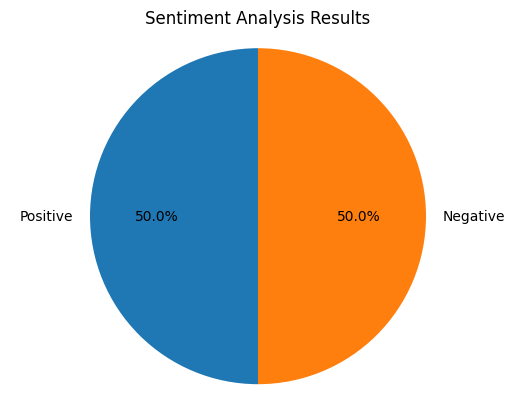

In [83]:
# pie chart
import matplotlib.pyplot as plt

# Assuming you have the counts of positive and negative tweets
positive_tweets = sum(1 for i in Y_test if i == 1)
negative_tweets = sum(1 for i in Y_test if i == 0)
total_tweets = positive_tweets + negative_tweets
positive_percentage = (positive_tweets / total_tweets) * 100
negative_percentage = (negative_tweets / total_tweets) * 100


labels = ['Positive', 'Negative']
sizes = [positive_percentage, negative_percentage]

# Creating the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Analysis Results')

plt.show()



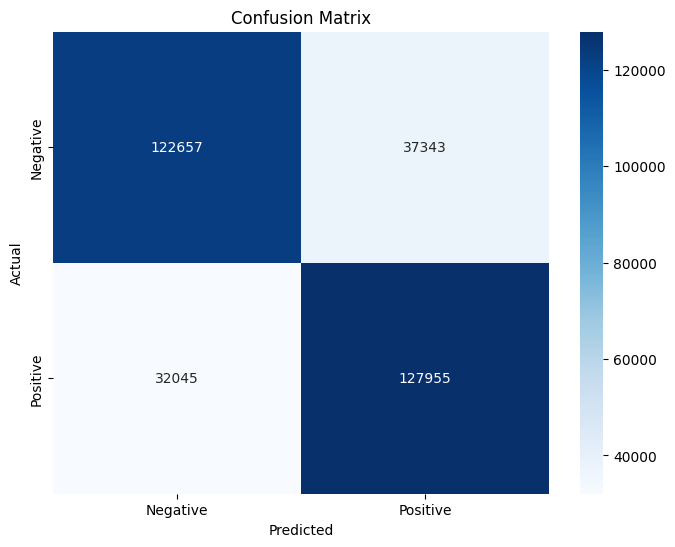

In [79]:
#heat map

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming X_test and X_test_prediction are defined from your previous code
cm = confusion_matrix(Y_test, X_test_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Saving the Trained model

In [62]:
import pickle

In [63]:
filename='trained_model.sav'
pickle.dump(model,open(filename,'wb'))